# Fitting mixed-model data

In the previous tutorial, we generated a data with a mixture of models.
In this tutorial, we will fit that data with a mixture of models using the **fitter** module.

Let's start by generating the data once again.

In [1]:
import numpy as np

from pymultifit.fitters import MixedDataFitter
from pymultifit.generators import multiple_models
fs = 14

In [2]:
# generate the array for data generation
x = np.linspace(-50, 50, 10_000)

# define the parameters for the models
parameters = [(20, -20, 2), (4, -5.5, 10), (5, -1, 0.5), (10, 3, 1), (4, 15, 3)]

# generate the data according to the parameters
y = multiple_models(x, params=parameters,
                    model_list=['gaussian', 'gaussian', 'laplace', 'laplace', 'gaussian'],
                    noise_level=0.2)

So far, the standard procedure of generating the data. Now for the fitting part, we make use of the **fitter** module.
For a mixture of the models, `pyMultiFit` provides the **MixedDataFitter** class.
This class takes four arguments:

* `x_values`: The x-values of the data.
* `y_values`: The y-values of the data.
* `model_list`: A list of models to fit the data with.
* `max_iterations`: The maximum number of iterations for the fitting process.

The `x_values` and `y_values` are the data generated above. And for the `model_list`, we will use the same list as above and in the same order.

In [3]:
mxf = MixedDataFitter(x, y, model_list=['gaussian', 'gaussian', 'laplace', 'laplace', 'gaussian'])

Now that we've instantiated the **MixedDataFitter** class, we can fit the data using the **fit** method.
The **fit** method requires a list of initial guesses for the parameters of the models.
The number of tuples in the initial guess list should be equal to the number of models in the `model_list`.
Let's generate some initial guesses for the parameters.

In [4]:
p0 = [(20, -15, 1.5), (1, -5.5, 3), (1, -1, 1), (5, 3, 1), (4, 12, 3)]

Now, we can provide the initial guesses to the **fit** method.

In [5]:
mxf.fit(p0)

/tmp/ipykernel_103872/626756459.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


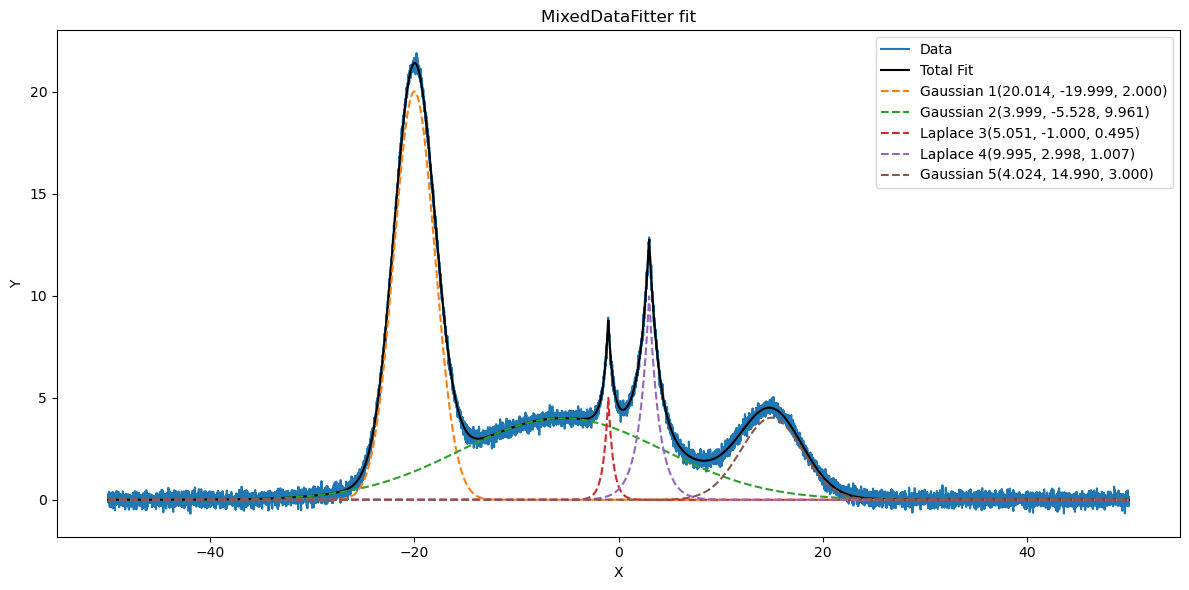

In [6]:
fig, ax = mxf.plot_fit(show_individuals=True)
fig.show()